In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [3]:
df = pd.read_csv("D:/Academic/25fall/DBA5101 Analytics in Managerial Economics/Group Project/Data-GP1.csv")

In [4]:
# Date Data Cleansing to format DD/MM/YYYY
df["parsed_Dept_Date"] = pd.to_datetime(df["Dept_Date"], format = "%m/%d/%y")
df["parsed_Purchase_Date"] = pd.to_datetime(df["Purchase_Date"],format = "%m/%d/%y")
#df["cleaned_Dept_Date"] = df["parsed_Dept_Date"].dt.strftime("%d/%m/%Y")
#df["cleaned_Purchase_Date"] = df["parsed_Purchase_Date"].dt.strftime("%d/%m/%Y")

In [5]:
df["Lead_Time"] = (df["parsed_Dept_Date"] - df["parsed_Purchase_Date"]).dt.days
df["is_weekend"] = (df["parsed_Dept_Date"].dt.weekday >= 5).astype(int)

In [6]:
# Estimating the demand
demand = (
    df.groupby(["Train_Number_All", "Dept_Date"])["Culmulative_sales"]
    .max()
    .reset_index()
    .rename(columns={"Culmulative_sales": "demand"})
)
df = df.merge(demand, on=["Train_Number_All", "Dept_Date"], how = "left")

In [7]:
# Feature visualization
variable_to_describe = ["demand","num_seats_total","mean_net_ticket_price","Lead_Time","is_weekend"]
print(df[variable_to_describe].describe())

              demand  num_seats_total  mean_net_ticket_price      Lead_Time  \
count  209697.000000    209697.000000          209697.000000  209697.000000   
mean       47.709796         2.383019             230.116900      63.264596   
std        31.912143         2.083324             147.024784      65.050759   
min         1.000000         1.000000               1.278969       0.000000   
25%        23.000000         1.000000             108.870193      15.000000   
50%        41.000000         2.000000             186.282199      39.000000   
75%        67.000000         3.000000             350.409481      91.000000   
max       187.000000        66.000000            7855.766106     364.000000   

          is_weekend  
count  209697.000000  
mean        0.279351  
std         0.448681  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000  


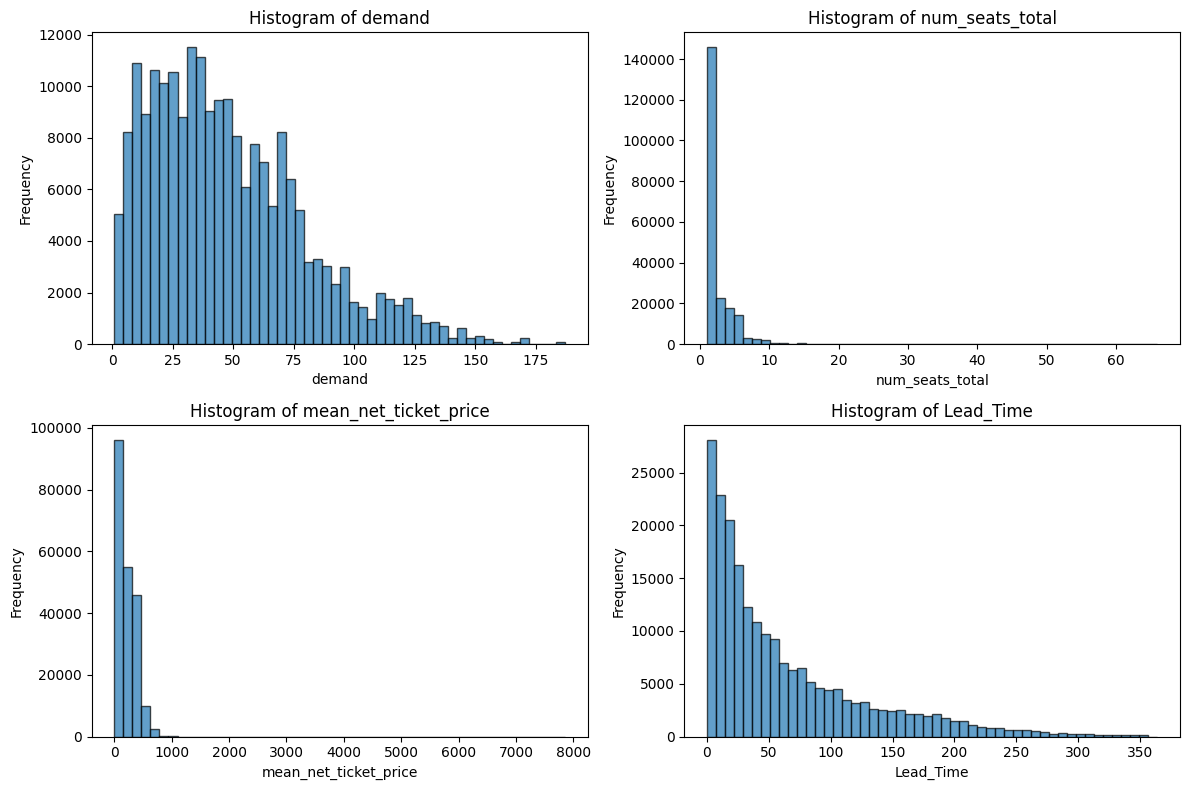

In [8]:
# Histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for col, ax in zip(variable_to_describe, axes.ravel()):
    ax.hist(df[col].dropna(), bins=50, alpha=0.7, edgecolor="black")
    ax.set_title(f"Histogram of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

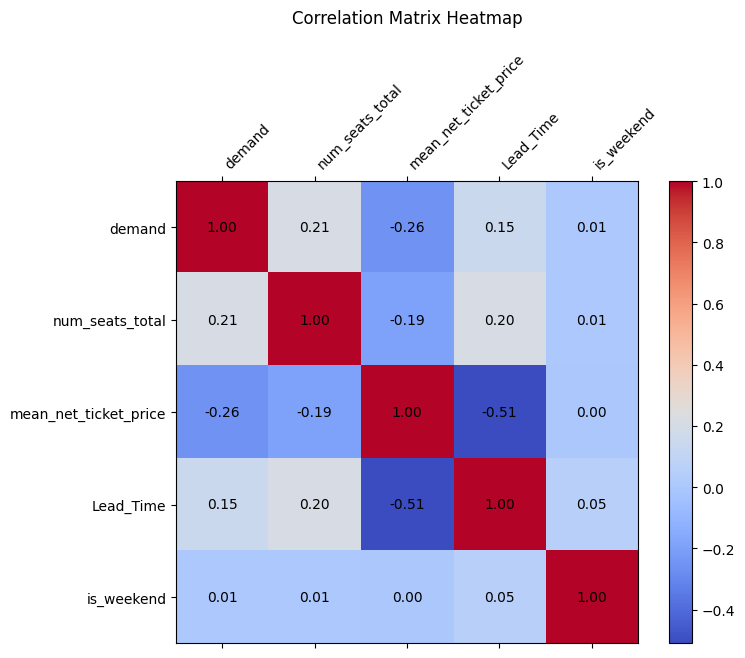

In [9]:
# Covariance analysis
covariation_matrix = df[variable_to_describe].cov()
correlation_matrix = df[variable_to_describe].corr()

fig, ax = plt.subplots(figsize=(8,6))
cax = ax.matshow(correlation_matrix, cmap='coolwarm')

# Add colorbar
fig.colorbar(cax)

# Set ticks and labels
ax.set_xticks(range(len(variable_to_describe)))
ax.set_yticks(range(len(variable_to_describe)))
ax.set_xticklabels(variable_to_describe, rotation=45, ha='left')
ax.set_yticklabels(variable_to_describe)

# Annotate correlation values
for i in range(len(variable_to_describe)):
    for j in range(len(variable_to_describe)):
        text = f"{correlation_matrix.iloc[i, j]:.2f}"
        ax.text(j, i, text, va='center', ha='center', color='black')

plt.title('Correlation Matrix Heatmap', pad=20)
plt.show()


In [10]:
# to log-transform some right-skewed variable
df_logtransform = df
#df_logtransform['log_num_seats_total'] = np.log(df_logtransform['num_seats_total'])
#df_logtransform['log_Lead_Time'] = np.log(df_logtransform['Lead_Time'])
#df_logtransform['log_mean_net_ticket_price'] = np.log(df_logtransform['mean_net_ticket_price'])

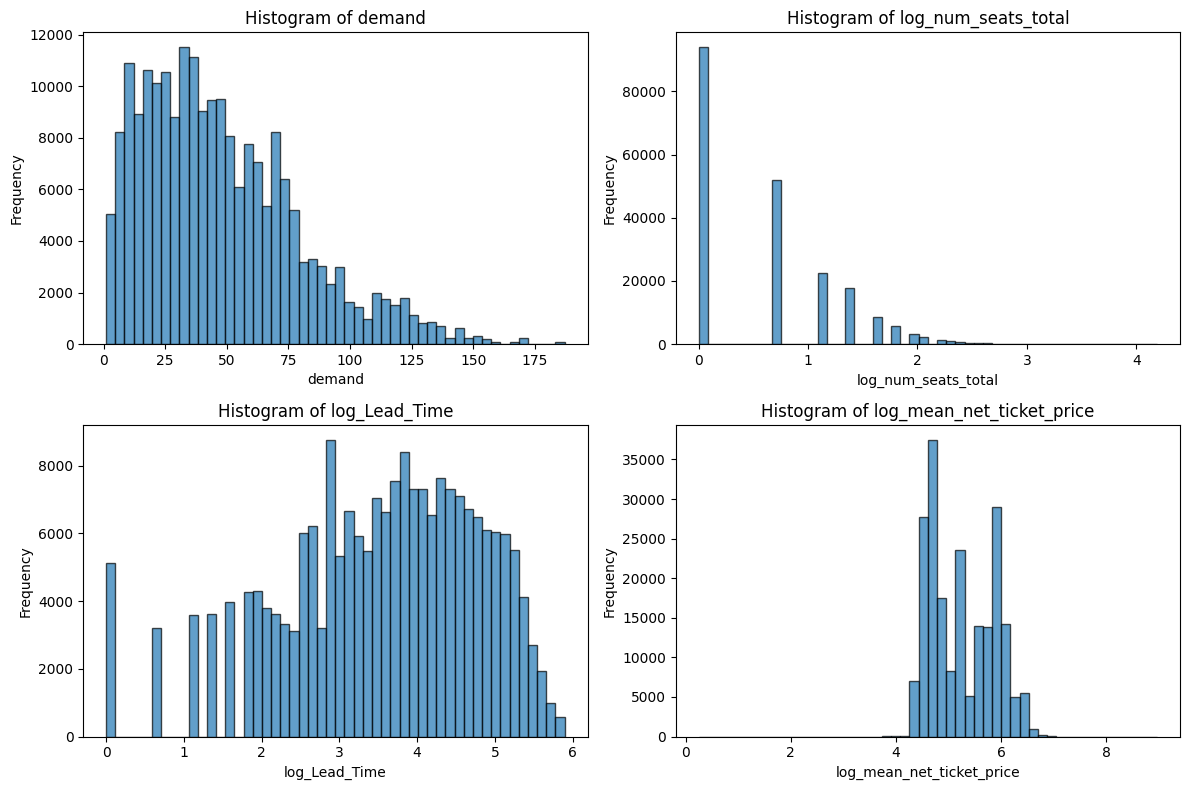

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for col, ax in zip(["demand","log_num_seats_total","log_Lead_Time","log_mean_net_ticket_price","is_weekend"], axes.ravel()):
    ax.hist(df_logtransform[col].dropna(), bins=50, alpha=0.7, edgecolor="black")
    ax.set_title(f"Histogram of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [12]:
df_logtransform['log_mean_net_ticket_price'] = np.log(df_logtransform['mean_net_ticket_price'])
df_logtransform['log_Lead_Time'] = np.log(df_logtransform['Lead_Time'].replace(0,1))
df_logtransform['log_num_seats_total'] = np.log(df_logtransform['num_seats_total'])
df_logtransform.describe()

,num_seats_total,mean_net_ticket_price,Culmulative_sales,isNormCabin,isReturn,isOneway,parsed_Dept_Date,parsed_Purchase_Date,Lead_Time,is_weekend,demand,log_mean_net_ticket_price,log_Lead_Time,log_num_seats_total
count,209697.000000,209697.000000,209697.000000,209697.000000,209697.000000,209697.000000,209697,209697,209697.000000,209697.000000,209697.000000,209697.000000,209697.000000,209697.000000
mean,2.383019,230.116900,15.875063,0.598249,0.480183,0.122873,2019-02-19 18:47:47.783516416,2018-12-18 12:26:46.683929856,63.264596,0.279351,47.709796,5.250089,3.513736,0.618505
min,1.000000,1.278969,1.000000,0.000000,0.000000,0.000000,2018-06-01 00:00:00,2018-06-01 00:00:00,0.000000,0.000000,1.000000,0.246054,0.000000,0.000000
25%,1.000000,108.870193,3.000000,0.000000,0.000000,0.000000,2018-11-05 00:00:00,2018-09-07 00:00:00,15.000000,0.000000,23.000000,4.690156,2.708050,0.000000
50%,2.000000,186.282199,8.000000,1.000000,0.000000,0.000000,2019-02-21 00:00:00,2018-12-19 00:00:00,39.000000,0.000000,41.000000,5.227263,3.663562,0.693147
75%,3.000000,350.409481,21.000000,1.000000,1.000000,0.000000,2019-05-27 00:00:00,2019-04-02 00:00:00,91.000000,1.000000,67.000000,5.859102,4.510860,1.098612
max,66.000000,7855.766106,187.000000,1.000000,1.000000,1.000000,2020-06-13 00:00:00,2019-06-30 00:00:00,364.000000,1.000000,187.000000,8.969003,5.897154,4.189655
std,2.083324,147.024784,19.795677,0.490253,0.499608,0.328292,NaN,NaN,65.050759,0.448681,31.912143,0.608971,1.289973,0.661471


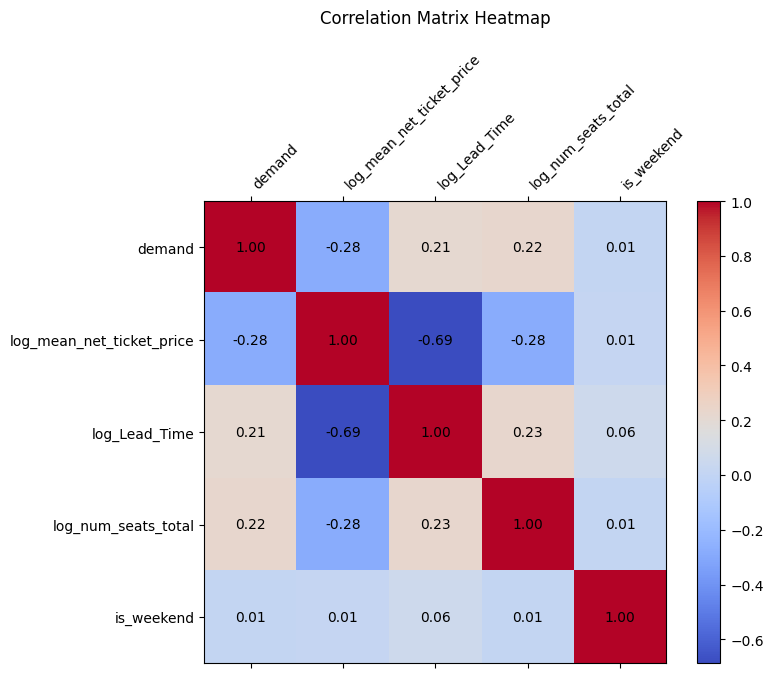

In [14]:
# plot the correlation matrix for the new plot
new_variable_set = ["demand","log_mean_net_ticket_price","log_Lead_Time","log_num_seats_total","is_weekend"]

correlation_matrix_2 = df_logtransform[new_variable_set].corr()

fig, ax = plt.subplots(figsize=(8,6))
cax = ax.matshow(correlation_matrix_2, cmap='coolwarm')

# Add colorbar
fig.colorbar(cax)

ax.set_xticks(range(len(new_variable_set)))
ax.set_yticks(range(len(new_variable_set)))
ax.set_xticklabels(new_variable_set, rotation=45, ha='left')
ax.set_yticklabels(new_variable_set)

for i in range(len(new_variable_set)):
    for j in range(len(new_variable_set)):
        text = f"{correlation_matrix_2.iloc[i, j]:.2f}"
        ax.text(j, i, text, va='center', ha='center', color='black')

plt.title('Correlation Matrix Heatmap', pad=20)
plt.show()

In [15]:
# naive model

x_1 = sm.add_constant(df_logtransform[["log_mean_net_ticket_price","log_Lead_Time","is_weekend","log_num_seats_total"]])
y_1 = df["demand"]

model = sm.OLS(y_1,x_1).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     5956.
Date:                Sun, 14 Sep 2025   Prob (F-statistic):               0.00
Time:                        20:19:27   Log-Likelihood:            -1.0124e+06
No. Observations:              209697   AIC:                         2.025e+06
Df Residuals:                  209692   BIC:                         2.025e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [16]:
# multicolinearity test --- VIF calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = x_1.values
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif["feature"] = x_1.columns
print(vif)


          VIF                    feature
0  225.988763                      const
1    1.966901  log_mean_net_ticket_price
2    1.914518              log_Lead_Time
3    1.009441                 is_weekend
4    1.088614        log_num_seats_total


In [17]:
# 2SLS models
from linearmodels.iv import IV2SLS
y_2 = df_logtransform["demand"]
instr = df_logtransform[["log_Lead_Time","is_weekend"]]
endog = df_logtransform["log_mean_net_ticket_price"]
exog = sm.add_constant(df[['log_num_seats_total']])

model_2 = IV2SLS(y_2, exog, endog, instr).fit()
print(model_2.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:                 demand   R-squared:                      0.1010
Estimator:                    IV-2SLS   Adj. R-squared:                 0.1010
No. Observations:              209697   F-statistic:                 1.818e+04
Date:                Sun, Sep 14 2025   P-value (F-stat)                0.0000
Time:                        20:19:40   Distribution:                  chi2(2)
Cov. Estimator:                robust                                         
                                                                              
                                     Parameter Estimates                                     
                           Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
---------------------------------------------------------------------------------------------
const                         114.99     0.9255     124.25     0.0000      113.18     

In [18]:
# One-hot coding variables

# 1. Customer Category
df_logtransform = pd.get_dummies(
    df_logtransform, columns = ["Customer_Cat"], prefix = "Customer")
df.drop("Customer_B", axis=1, inplace=True)

# 2. Train Number
df_logtransform = pd.get_dummies(
    df_logtransform, columns = ["Train_Number_All"], prefix = "Train Number")



In [19]:
print(df_logtransform["Train Number_B"].describe())

count     209697
unique         2
top        False
freq      182842
Name: Train Number_B, dtype: object


In [27]:
#Temp
df_logtransform.drop("Customer_B", axis=1, inplace=True)

In [30]:
# New models with one-hot dummies as instrumental variables


y_3 = df_logtransform["demand"]
endog_2 = df_logtransform["log_mean_net_ticket_price"]
exog_2 = df_logtransform['Lead_Time']
var_1 = df_logtransform[["is_weekend","isNormCabin"]]
var_2 = df_logtransform.filter(regex='^Customer_|^Train Number_').astype(int)
var_1.index = pd.RangeIndex(len(var_1))
var_2.index = pd.RangeIndex(len(var_2))
instr_2 = pd.concat([var_1.reset_index(drop=True), var_2.reset_index(drop=True)], axis = 1)


model_3 = IV2SLS(y_3, exog_2, endog_2, instr_2).fit()
print(model_3.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:                 demand   R-squared:                      0.6752
Estimator:                    IV-2SLS   Adj. R-squared:                 0.6752
No. Observations:              209697   F-statistic:                 4.407e+05
Date:                Sun, Sep 14 2025   P-value (F-stat)                0.0000
Time:                        20:40:40   Distribution:                  chi2(2)
Cov. Estimator:                robust                                         
                                                                              
                                     Parameter Estimates                                     
                           Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
---------------------------------------------------------------------------------------------
Lead_Time                     0.1201     0.0012     103.90     0.0000      0.1179     

In [74]:
# when we take the sum of all num_seats_sold as demand level
# we need to clean the database again, add all num_seats_sold filtered by Train Number and Dept Date

# aggregate the num_seats_sold
df_2 = df
df_2.drop(columns = ["demand"], inplace = True)
demand = (
    df.groupby(['parsed_Dept_Date', 'Train_Number_All'])['num_seats_total']
      .sum()
      .reset_index(name='demand')
)
df_2 = df_2.merge(demand, on=['parsed_Dept_Date', 'Train_Number_All'], how='left')




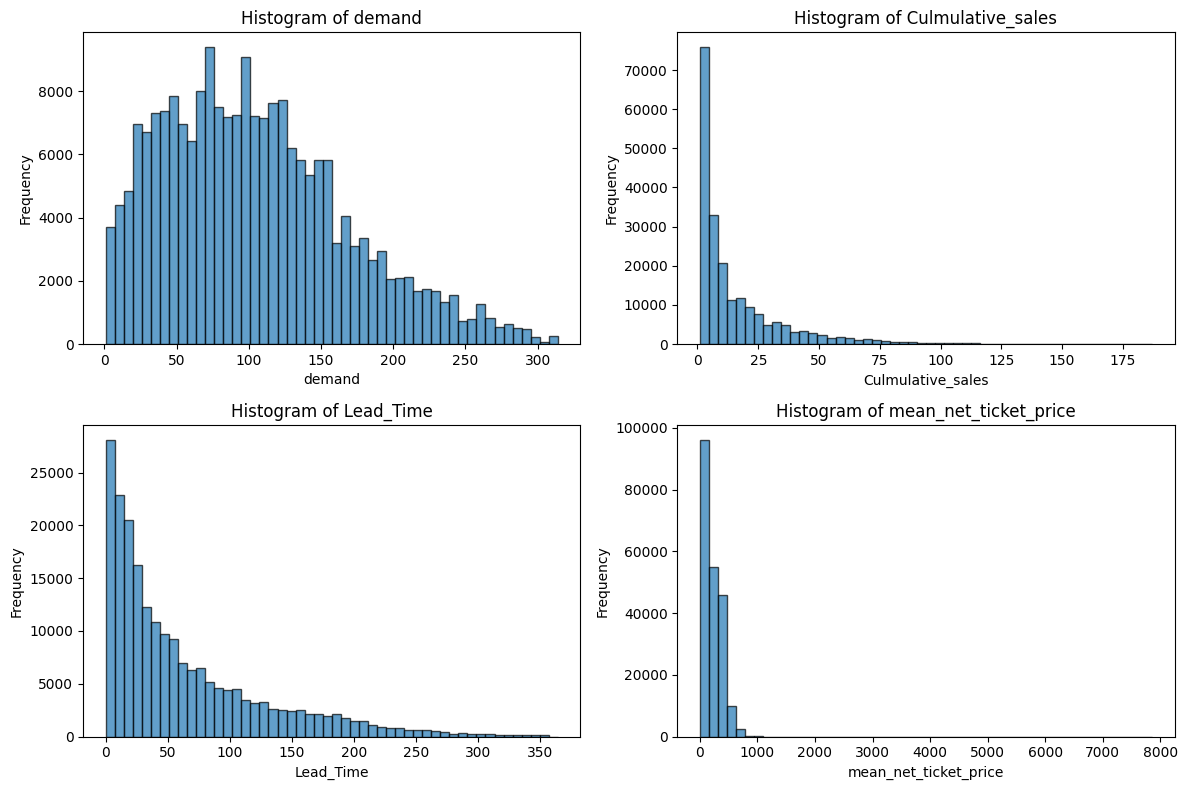

In [75]:
# plot the demand distribution
fig, axes = plt.subplots(2,2, figsize=(12, 8))

for col, ax in zip(["demand","Culmulative_sales","Lead_Time","mean_net_ticket_price"], axes.ravel()):
    ax.hist(df_2[col].dropna(), bins=50, alpha=0.7, edgecolor="black")
    ax.set_title(f"Histogram of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [76]:
# build the new model with demand = sum ('num_seats_total')
# Naive nodel
# demand ~ price
x_3_1 = sm.add_constant(df_2[["mean_net_ticket_price"]])
y_3_1 = df_2["demand"]

model_3_1 = sm.OLS(y_3_1, x_3_1).fit()
print(model_3_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     3368.
Date:                Sun, 14 Sep 2025   Prob (F-statistic):               0.00
Time:                        22:02:42   Log-Likelihood:            -1.1675e+06
No. Observations:              209697   AIC:                         2.335e+06
Df Residuals:                  209695   BIC:                         2.335e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   117.02

In [77]:
# demand ~ price + lead time
x_3_2 = sm.add_constant(df_2[["mean_net_ticket_price","Lead_Time"]])
y_3_2 = df_2["demand"]
model_3_2 = sm.OLS(y_3_2, x_3_2).fit()
print(model_3_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1810.
Date:                Sun, 14 Sep 2025   Prob (F-statistic):               0.00
Time:                        22:02:43   Log-Likelihood:            -1.1674e+06
No. Observations:              209697   AIC:                         2.335e+06
Df Residuals:                  209694   BIC:                         2.335e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   121.51

In [78]:
# demand, ticket price was log transformed because they are both right-skewed
# the new model calculates the price elasticity of demand

# log(demand) ~ ticket price + lead time

df_2["log_demand"] = np.log(df_2["demand"])
df_2["log_mean_net_ticket_price"] = np.log(df_2["mean_net_ticket_price"])

x_3_3 = sm.add_constant(df_2[["mean_net_ticket_price","Lead_Time"]])
y_3_3 = df_2["log_demand"]
model_3_3 = sm.OLS(y_3_3, x_3_3).fit()
print(model_3_3.summary())

                            OLS Regression Results                            
Dep. Variable:             log_demand   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     2741.
Date:                Sun, 14 Sep 2025   Prob (F-statistic):               0.00
Time:                        22:02:45   Log-Likelihood:            -2.5583e+05
No. Observations:              209697   AIC:                         5.117e+05
Df Residuals:                  209694   BIC:                         5.117e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     4.72

In [79]:
# log(demand) ~ log(ticket price) + lead time

x_3_4 = sm.add_constant(df_2[["log_mean_net_ticket_price","Lead_Time"]])
y_3_4 = df_2["log_demand"]
model_3_4 = sm.OLS(y_3_4, x_3_4).fit()
print(model_3_4.summary())

                            OLS Regression Results                            
Dep. Variable:             log_demand   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     2857.
Date:                Sun, 14 Sep 2025   Prob (F-statistic):               0.00
Time:                        22:02:47   Log-Likelihood:            -2.5571e+05
No. Observations:              209697   AIC:                         5.114e+05
Df Residuals:                  209694   BIC:                         5.115e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [89]:
# log(demand) ~ log(ticket price) + lead time + is_weekend(departure) + is_VIP_customer

# calculate day of the week when train departs
df_2["is_weekend"] = (df_2["parsed_Dept_Date"].dt.weekday >= 5).astype(int)

# calculate if the customer is Category A or not

# Release this # when first implement this command
# df_2 = pd.get_dummies(df_2, columns = ["Customer_Cat"], prefix = "Customer")

df_2["Customer_A"] = df_2["Customer_A"].astype(int)

# modeling: log(demand) ~ log(ticket price) + lead time + is_weekend(departure) + is_VIP_customer
x_3_5 = sm.add_constant(df_2[["log_mean_net_ticket_price","Lead_Time","is_weekend","Customer_A"]])
y_3_5 = df_2["log_demand"]
model_3_5 = sm.OLS(y_3_5, x_3_5).fit()
print(model_3_5.summary())

# Still, this result is not enough because of so many omitted variables

                            OLS Regression Results                            
Dep. Variable:             log_demand   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     1587.
Date:                Sun, 14 Sep 2025   Prob (F-statistic):               0.00
Time:                        22:19:37   Log-Likelihood:            -2.5540e+05
No. Observations:              209697   AIC:                         5.108e+05
Df Residuals:                  209692   BIC:                         5.109e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [92]:
# We need to tackle omitted variables by incorporating as many variables as possible into this model
# although this will definitely cause endogeneity, we try this as a naive approach
# later we will use both 2SLS and fixed effect to eliminate endogeneity

# one-hot coding on train numbers
# for first-time running, please delete the # of the next row
# df_2 = pd.get_dummies(
    #df_2, columns = ["Train_Number_All"], prefix = "Train Number")

# construct sample space: incorporate isNormCabin and customer type
y_3_6 = df_2["log_demand"]
col_1 = df_2[["log_mean_net_ticket_price","Lead_Time","is_weekend","Customer_A","isNormCabin"]]
col_2 = df_2.filter(regex='^Train Number_').astype(int)
x_3_6 = pd.concat([col_1.reset_index(drop=True), col_2.reset_index(drop=True)], axis = 1)

# modeling: log(demand) ~ log (price) + 22 other variables
model_3_6 = sm.OLS(y_3_6, x_3_6).fit()
print(model_3_6.summary())

                            OLS Regression Results                            
Dep. Variable:             log_demand   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     7263.
Date:                Sun, 14 Sep 2025   Prob (F-statistic):               0.00
Time:                        22:49:45   Log-Likelihood:            -2.0551e+05
No. Observations:              209697   AIC:                         4.111e+05
Df Residuals:                  209677   BIC:                         4.113e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
log_mean_net_ticket_pr

In [148]:
# Now we need to tackle endogeneity
# Option A: 2SLS model

# First find all possible IVs can influence ticket price but do not directly influence demand
# Train numbers, isNormCabin, is_weekend

# df_2[['isNormCabin','is_weekend']]
# pd.concat([df[["isNormCabin",'is_weekend']].reset_index(drop=True), col_2.reset_index(drop=True)], axis = 1)

# Build the sample set
y_3_7 = df_2["log_demand"]
endog_3 = df_2[["log_mean_net_ticket_price"]]
exog_3 = df_2[["Lead_Time","Customer_A"]]
instr_3 = pd.concat([df[["isNormCabin",'is_weekend']].reset_index(drop=True),
                     col_2.reset_index(drop=True)], axis = 1)
model_3_7 = IV2SLS(y_3_7, exog_3, endog_3, instr_3).fit()
print(model_3_7.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:             log_demand   R-squared:                      0.9542
Estimator:                    IV-2SLS   Adj. R-squared:                 0.9542
No. Observations:              209697   F-statistic:                 4.393e+06
Date:                Mon, Sep 15 2025   P-value (F-stat)                0.0000
Time:                        18:01:39   Distribution:                  chi2(3)
Cov. Estimator:                robust                                         
                                                                              
                                     Parameter Estimates                                     
                           Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
---------------------------------------------------------------------------------------------
Lead_Time                     0.0030  4.582e-05     64.633     0.0000      0.0029     

In [146]:
# Check on IVs
# test if IVs well explain ticket price

temp_X = instr_3
temp_Y = df_2["log_mean_net_ticket_price"]

temp_model = sm.OLS(temp_Y, temp_X).fit()

print(temp_model.summary())

# The result passes the weak IV test (require F > 10)

                                OLS Regression Results                               
Dep. Variable:     log_mean_net_ticket_price   R-squared:                       0.540
Model:                                   OLS   Adj. R-squared:                  0.540
Method:                        Least Squares   F-statistic:                 1.537e+04
Date:                       Mon, 15 Sep 2025   Prob (F-statistic):               0.00
Time:                               17:57:31   Log-Likelihood:            -1.1216e+05
No. Observations:                     209697   AIC:                         2.244e+05
Df Residuals:                         209680   BIC:                         2.245e+05
Df Model:                                 16                                         
Covariance Type:                   nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

In [149]:
# Hansen test
# to test if these instruments are truly exogenous
print(model_3_7.j_stat)

AttributeError: 'IVResults' object has no attribute 'j_stat'

In [128]:
# Option B: Fixed effect
# import smf
#import statsmodels.formula.api as smf

# modeling:
# log(price), Lead_Time are continuous variables
# fixed_effect categorical variables: isNormCabin, customer type, train number and day of the week on departure
df_3 = df_2
df_3 = df_3.rename(columns=lambda x: x.strip().replace(' ', '_'))

fe_formula = (
    'log_demand ~ log_mean_net_ticket_price + Lead_Time + '
    'C(Customer_A) + C(isNormCabin) + C(is_weekend) + '
    'Train_Number_A + Train_Number_B + Train_Number_C + Train_Number_D + '
    'Train_Number_E + Train_Number_F + Train_Number_G + Train_Number_H + '
    'Train_Number_I + Train_Number_J + Train_Number_K + Train_Number_L + '
    'Train_Number_M + Train_Number_N + Train_Number_O'
)

fe_model = smf.ols(fe_formula, data=df_3).fit(cov_type='HC3')
print(fe_model.summary())

# It has the same result without using the fix-effect model


                            OLS Regression Results                            
Dep. Variable:             log_demand   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                 3.676e+07
Date:                Mon, 15 Sep 2025   Prob (F-statistic):               0.00
Time:                        00:12:30   Log-Likelihood:            -2.0551e+05
No. Observations:              209697   AIC:                         4.111e+05
Df Residuals:                  209677   BIC:                         4.113e+05
Df Model:                          19                                         
Covariance Type:                  HC3                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

C:\Users\18421\PyCharmMiscProject\.venv\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 20, but rank is 1
  warnings.warn('covariance of constraints does not have full '


Fixed effect analysis has the same R^2 level compared with regular OLS. It just extracts the endogeneity of exogenous variables.
When there are too many fixed-effect terms, it is hard to estimate the influence level of each categorical variable respectively.

In [136]:

# Option B: Fixed effect
# import smf
#import statsmodels.formula.api as smf

# modeling:
# log(price), Lead_Time are continuous variables
# fixed_effect categorical variables: isNormCabin, customer type, train number and day of the week on departure

from linearmodels.panel import PanelOLS

df_4 = df_2.reset_index(drop = True)
df_4["fake_time"] = 1
df_4 = df_4.set_index(['fake_time'])

# Fixed effect to absorb
absorb_var = ["Customer_A", "isNormCabin", "is_weekend", "Train Number_A", "Train Number_B", "Train Number_C", "Train Number_D", "Train Number_E", "Train Number_F", "Train Number_G", "Train Number_H", "Train Number_I", "Train Number_J", "Train Number_K", "Train Number_L", "Train Number_M", "Train Number_N", "Train Number_O"]

fe_model = PanelOLS(
    df_4['log_demand'],
    df_4[['log_mean_net_ticket_price', 'Lead_Time']],
    other_effects = df_4[["Customer_A", "isNormCabin", "is_weekend", "Train Number_A", "Train Number_B", "Train Number_C", "Train Number_D", "Train Number_E", "Train Number_F", "Train Number_G", "Train Number_H", "Train Number_I", "Train Number_J", "Train Number_K", "Train Number_L", "Train Number_M", "Train Number_N", "Train Number_O"]]
)
fe_res = fe_model.fit(cov_type='robust')

# Summary
print(fe_res.summary)

ValueError: Series can only be used with a 2-level MultiIndex

In [138]:
# Another version of fixed-effect model code
# Previous version have ValueError

# Step 1: Reset index and create a fake time index (since it's cross-sectional)
df_4 = df_2.reset_index(drop=True)
df_4["fake_time"] = 1

# Step 2: Set multi-index [fake_time, observation_id]
df_4 = df_4.set_index(["fake_time", df.index])

# Step 3: Define dependent and exogenous variables
y_3_8 = df_4["log_demand"]
x_3_8 = df_4[["log_mean_net_ticket_price", "Lead_Time"]]

# Step 4: Define which variables to absorb as fixed effects
absorbed_effects = ["Customer_A", "isNormCabin", "is_weekend"] + \
                   [col for col in df_4.columns if col.startswith("Train Number_")]

# Step 5: Estimate fixed effect model
fe_model_2 = PanelOLS(
    dependent=y_3_8,
    exog=x_3_8,
    entity_effects=False,  # no entity FE, since we absorb directly
    time_effects=False,
    other_effects=df_4[absorbed_effects]
)

results = fe_model_2.fit(cov_type="robust")
print(results.summary)


ValueError: At most two effects supported.